Machine Learning 
 - Field within AI that uses statistical techniques 
   that enable computers to "learn" - or perform a task better
   without being explicitly programmed"
 
 - Method: Create a model, feed it "training data" and then test
   on "testing" data
   
Examples:
 - Autonomous/self-driving cars
 - Image recognition (Facebook, Instagram, Snap, etc.)
 - Image Processing (Filters, etc.)
 - Sentiment Analysis (Text, Advertising)
 - Speech recognition (Shazam, Siri, Google Assistant)
         
         
 Everybody Dance Now (Motion Transfer)
 - Paper: https://arxiv.org/pdf/1808.07371v1.pdf
 - Video: https://www.youtube.com/watch?v=PCBTZh41Ris&feature=youtu.be
 
 Demos (https://experiments.withgoogle.com/collection/ai):
  - Quick, Draw: https://quickdraw.withgoogle.com/
  - Handwriting: https://distill.pub/2016/handwriting/

In [ ]:
# Python Crashcourse

a = 10
b = 5
print(a + b)

In [ ]:
# Functions

def foo(a,b):
    c = a + b
    return c

x = foo(6,4)

print(x)

In [ ]:
# List (square brackets):

my_list = [2,4,6,8] 

# List Index:

i = my_list[1]
print(i)

In [ ]:
# Dictionary (curly brackets):
# {key: value}

my_dictionary = {'red': 1, 'blue': 2, 'green': 3}

print(my_dictionary['green'])

In [ ]:
# Loop
# "i" is arbitrary
my_list = [2,4,6,8]

for i in my_list: 
    print(i*2)

In [ ]:
# Source: National Institute of Diabetes and Digestive and Kidney Diseases
# Study: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/

# pregnancies - total pregnancies
# glucose - Plasma glucose concentration
# blood_pressure - Diastolic blood pressure (mm Hg)
# skin_thickness - Triceps skin fold thickness (mm)
# insulin - Hour serum insulin (mu U/ml)
# bmi - Body mass index (weight in kg/(height in m)^2)
# pedigree_function - A measure of hereditary risk and genetic influence
# age - In years
# classification - 0 or 1 based on diagnoses

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/mkrkelj1/machine-learning-intro-workshop/master/health_data.csv'
df  = pd.read_csv(url)
print(df.head())

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   pedigree_function  age  classification  
0              0.627   50               1  
1              0.351   31               0  
2              0.672   32               1  
3              0.167   21               0  
4              2.288   33               1  


In [7]:
df.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,classification
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
classification,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


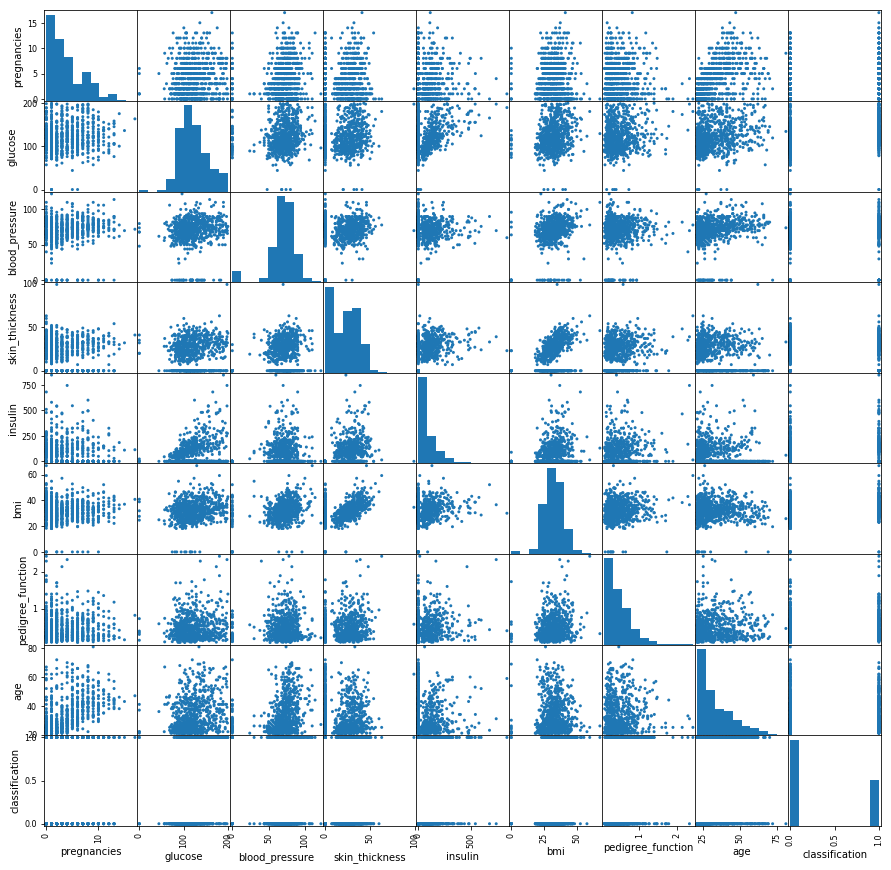

In [11]:
scatter_matrix = pd.plotting.scatter_matrix(df, alpha = 1.0, figsize = (15,15))

In [12]:
# Get "features"

X_var = df.drop("classification", axis = 1)
print(X_var.head())

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   pedigree_function  age  
0              0.627   50  
1              0.351   31  
2              0.672   32  
3              0.167   21  
4              2.288   33  


In [13]:
Y_var = df['classification']

print(Y_var.head())

0    1
1    0
2    1
3    0
4    1
Name: classification, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

X_training, X_testing, Y_training, Y_testing = train_test_split(X_var, Y_var, test_size = 0.25, random_state=50)

In [17]:
# Make a prediction
# KNN (k-nearest neighbors algorithm)

from sklearn.neighbors import KNeighborsClassifier

neighbors = 10
knn       = KNeighborsClassifier(neighbors)

knn_classifier = knn.fit(X_training, Y_training)
test_sample    = [2.0, 290, 65, 0, 0, 23, .254, 23]

knn_classifier.predict([test_sample])

array([1])

In [24]:
# How accurate was the prediction?
# Need to validate the model
# kfold & cross validation: Cross Val Documentation: https://scikit-learn.org/stable/modules/cross_validation.html

from sklearn.model_selection import KFold
from sklearn import model_selection

seed  = 10
kfold = model_selection.KFold(5, random_state=seed)
model = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(model, X_training, Y_training, cv = kfold, scoring = 'accuracy')
print("Predictions: ")
print(cv_results)
print("Mean: ")
print(cv_results.mean())

Predictions: 
[0.70689655 0.75652174 0.70434783 0.80869565 0.64347826]
Mean: 
0.7239880059970014


In [25]:
# How to improve? Observe the data:

print(X_training.head())

     pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
243            6      119              50              22      176  27.1   
252            2       90              80              14       55  24.4   
520            2       68              70              32       66  25.0   
536            0      105              90               0        0  29.6   
621            2       92              76              20        0  24.2   

     pedigree_function  age  
243              1.318   33  
252              0.249   24  
520              0.187   25  
536              0.197   46  
621              1.698   28  


In [27]:
# Replace 0's with median:

X_training_cleaned = X_training.replace(0, X_var.median())

print(X_training_cleaned.head())

     pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
243            6      119              50              22    176.0  27.1   
252            2       90              80              14     55.0  24.4   
520            2       68              70              32     66.0  25.0   
536            3      105              90              23     30.5  29.6   
621            2       92              76              20     30.5  24.2   

     pedigree_function  age  
243              1.318   33  
252              0.249   24  
520              0.187   25  
536              0.197   46  
621              1.698   28  


In [31]:
# Normalization / Scaling
# Consider the difference between an additional pregnancy (+1) and a one point higher blood pressure

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_training_cleaned_scaled = scaler.fit_transform(X_training_cleaned)
X_training_cleaned_scaled = pd.DataFrame(X_training_cleaned_scaled)

X_training_cleaned_scaled.head()

,0,1,2,3,4,5,6,7
0,0.3125,0.483871,0.265306,0.267857,0.194712,0.182004,0.529462,0.200000
1,0.0625,0.296774,0.571429,0.125000,0.049279,0.126789,0.073015,0.050000
2,0.0625,0.154839,0.469388,0.446429,0.062500,0.139059,0.046541,0.066667
3,0.1250,0.393548,0.673469,0.285714,0.019832,0.233129,0.050811,0.416667
4,0.0625,0.309677,0.530612,0.232143,0.019832,0.122699,0.691716,0.116667


In [33]:
# Try validating the data again:

from sklearn.model_selection import KFold
from sklearn import model_selection

seed  = 10
kfold = model_selection.KFold(5, random_state = seed)
model = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(model, X_training_cleaned_scaled, Y_training, cv = kfold, scoring = 'accuracy')
print("Predictions: ")
print(cv_results)
print("Mean: ")
print(cv_results.mean())

Predictions: 
[0.81034483 0.70434783 0.74782609 0.82608696 0.67826087]
Mean: 
0.7533733133433284


In [41]:
# Test more models
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

from sklearn.tree import DecisionTreeClassifier

seed  = 10
kfold = model_selection.KFold(5, random_state = seed)
model = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(model, X_training_cleaned_scaled, Y_training, cv = kfold, scoring = 'accuracy')
print("Predictions: ")
print(cv_results)
print("Mean: ")
print(cv_results.mean())

# Bad algo for this dataset

Predictions: 
[0.68103448 0.67826087 0.74782609 0.76521739 0.63478261]
Mean: 
0.7014242878560719


In [56]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

seed  = 10
kfold = model_selection.KFold(5, random_state = seed)
model = LogisticRegression()
#model = LogisticRegression(solver = "saga", random_state = seed, multi_class='multinomial')
cv_results = model_selection.cross_val_score(model, X_training_cleaned_scaled, Y_training, cv = kfold, scoring = 'accuracy')
print("Predictions: ")
print(cv_results)
print("Mean: ")
print(cv_results.mean())

Predictions: 
[0.75862069 0.74782609 0.77391304 0.7826087  0.73913043]
Mean: 
0.7604197901049474


In [64]:
from sklearn.svm import SVC

seed  = 10
kfold = model_selection.KFold(5, random_state = seed)
model = SVC(kernel = "linear")
#model = LogisticRegression(solver = "saga", random_state = seed, multi_class='multinomial')
cv_results = model_selection.cross_val_score(model, X_training_cleaned_scaled, Y_training, cv = kfold, scoring = 'accuracy')
print("Predictions: ")
print(cv_results)
print("Mean: ")
print(cv_results.mean())

Predictions: 
[0.77586207 0.79130435 0.77391304 0.8        0.75652174]
Mean: 
0.77952023988006


In [ ]:
# Clean and Scale the "testing" data

scaler = MinMaxScaler(feature_range=(0, 1))

X_testing_cleaned        = X_testing.replace(0, X_var.median())
X_testing_cleaned_scaled = scaler.fit_transform(X_testing_cleaned)
X_testing_cleaned_scaled = pd.DataFrame(X_testing_cleaned_scaled)

In [203]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 8))
mlp.fit(X_training_cleaned_scaled, Y_training)

predictions = mlp.predict(X_testing_cleaned_scaled)

In [204]:
from sklearn.metrics import classification_report
print(classification_report(Y_testing,predictions))

             precision    recall  f1-score   support

          0       0.82      0.76      0.79       122
          1       0.63      0.70      0.66        70

avg / total       0.75      0.74      0.74       192

